# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kirti  | Kanubhai Chaudhari | KSC11/29/2024| 4 | 27.5 |
| Member 2: | Darshan | Menasa Somashekara | MSD 11/29/2024 | 2 | 25 |
| Member 3: | Manojkumar  | Sultanipura Basavarajappa | MSB 11/29/2024 | 4| 25.5 |
| Member 4: | Ajay  | Hamirbhai Parmar | AHP 11/29/2024 | 1.5| 20 |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [12]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [13]:
import pandas as pd

# Load cross-validation/training dataset
cv_set = pd.read_csv('https://raw.githubusercontent.com/kirti-chaudhari680/engg680_2024_fall/main/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# Load the first test dataset
test_set1 = pd.read_csv('https://raw.githubusercontent.com/kirti-chaudhari680/engg680_2024_fall/main/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# Load the second test dataset
test_set2 = pd.read_csv('https://raw.githubusercontent.com/kirti-chaudhari680/engg680_2024_fall/main/Lab_Assignment4/2020-03-14-16-45-35.csv')


For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [14]:
# TODO: Display first two rows of cv_set
# (1 mark)
cv_set.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [15]:
# TODO: Load the info method of cv_set
# (1 mark)

cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [16]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"\n'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")


'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [ ]:
# TODO: Display all columns in cv_set
# (1 mark)
print("\nColumns in 'cv_set':")
print(list(cv_set.columns))


Columns in 'cv_set':
['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [ ]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']  # Extract the motion_state column as the target vector

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [ ]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])  # Drop the motion_state column to get the features

# Display the first two rows of X to verify
X.head(2)




,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# Display the first three columns
X.iloc[:, :3]

,ax_sum,ay_sum,az_sum
0,-0.003929,-0.093081,9.789349
1,-0.000966,-0.092417,9.789095
2,-0.008014,0.037066,9.792780
3,-0.097655,0.286081,9.781135
4,-0.239673,0.288418,9.779307
...,...,...,...
1529,0.021994,-0.496739,9.779166
1530,0.062780,-0.216595,9.785057
1531,-0.021749,-0.806389,9.793851
1532,-0.023262,-0.607760,9.785225


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [ ]:
from sklearn.model_selection import train_test_split

# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    # 30% of data for testing
    random_state=42,  # Set random state for reproducibility
    stratify=y        # Stratify by the target variable
)


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [ ]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('classifier', SVC())          # Step 2: Use Support Vector Classifier
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test different scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Kernel coefficient
    'classifier__kernel': ['rbf']                        # Radial Basis Function kernel
}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# (2 marks)

#print("Best params:\n{}\n".format(???))
print("Best params:\n{}\n".format(grid.best_params_))

#print("Best cross-validation train score: {:.2f}".format(???))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))

#print("Best cross-validation validation score: {:.2f}".format(???))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

#print("Test-set score: {:.2f}".format(???)))
test_set_accuracy = grid.best_estimator_.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))



Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

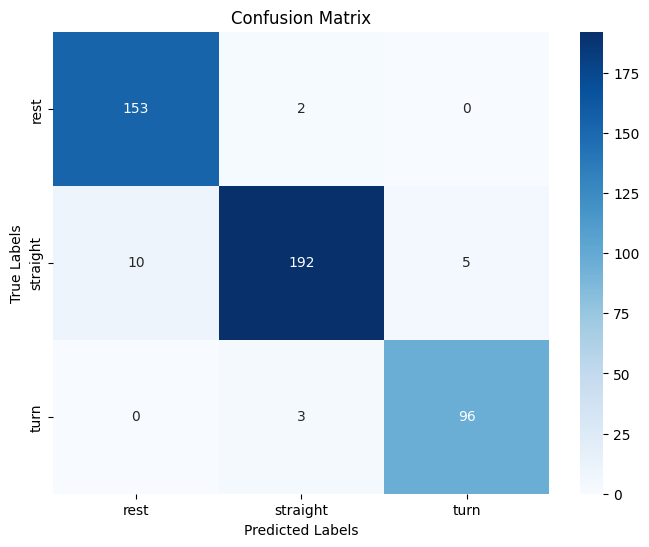


Classification Report:
               precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1.The model demonstrates a good fit to the dataset. The cross-validation train score (0.93) and validation score (0.91) are close, suggesting no significant overfitting. On the test set, the accuracy (0.89) is consistent with cross-validation results, indicating strong generalization. The classification report shows high precision, recall, and F1-scores across all classes, and the confusion matrix highlights minimal misclassifications. This confirms that the model is well-suited for the task.

2.The intervals for C and gamma are reasonable and likely suitable for the dataset. However, after analyzing the grid search results: If optimal values lie near the edges (e.g., C = 100 or gamma = 0.001), expanding the range in subsequent experiments could yield better results. If the model is overfitting or underfitting, finer intervals (e.g., logarithmic scaling like [0.001, 0.005, 0.01, 0.05, 0.1]) may be more appropriate for gamma or C.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 mark)
y1 = test_set1['motion_state']  # Extract target column
X1 = test_set1.drop(columns=['motion_state'])  # Extract feature columns

# Display first two rows of features
X1.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']  # Extract target column
X2 = test_set2.drop(columns=['motion_state'])  # Extract feature columns

# Display first two rows of features
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

# Calculate and print accuracy for test_set1
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print accuracy for test_set2
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

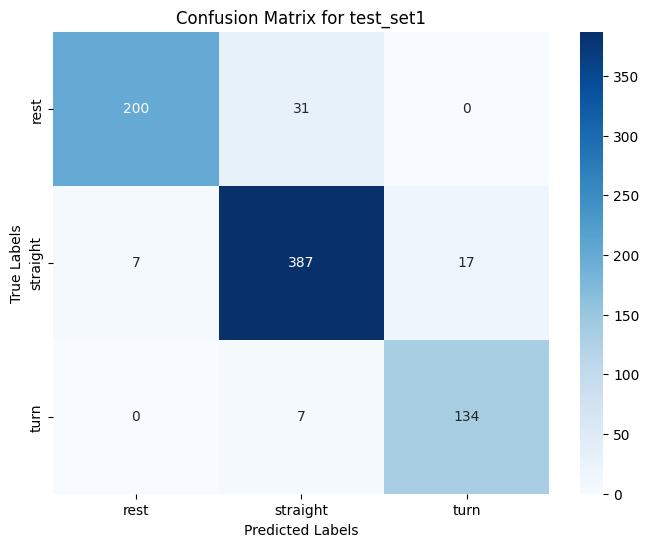


Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 mark)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y1, y1_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print classification report
print("\nClassification Report for test_set1:\n", classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

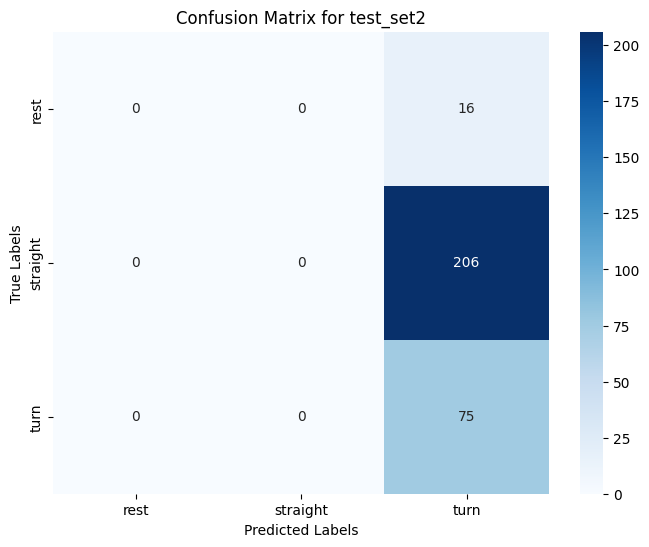


Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Compute confusion matrix
conf_matrix = confusion_matrix(y2, y2_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print classification report
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1.
The model performs well on the training set (X_test, y_test) and generalizes effectively to test_set1 (X1, y1), achieving high accuracy and balanced precision, recall, and F1-scores. However, its performance on test_set2 (X2, y2) degrades significantly, indicating a mismatch between the training data and test_set2.

2.
Potential causes for the performance drop include differernces in datab distribution between test_set2 and the training set. This may result from variations in, noise. Additionally, class imbalances in the training set may lead to misclassifications in underrepresented classes. Lastly, dataset shift or domain shift, such as recording test_set2 in different geographical locations or with different sensors, could contribute to the observed behavior.


___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum','gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    # 30% of data for testing
    random_state=42,  # Set random state for reproducibility
    stratify=y        # Stratify by the target variable
)
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('classifier', SVC())          # Step 2: Use Support Vector Classifier
])
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test different scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Kernel coefficient
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)





GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
print("Best params:\n{}\n".format(grid.best_params_))

#print("Best cross-validation train score: {:.2f}".format(???))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))

#print("Best cross-validation validation score: {:.2f}".format(???))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

#print("Test-set score: {:.2f}".format(???)))
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.84
Best cross-validation validation score: 0.82
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification reports

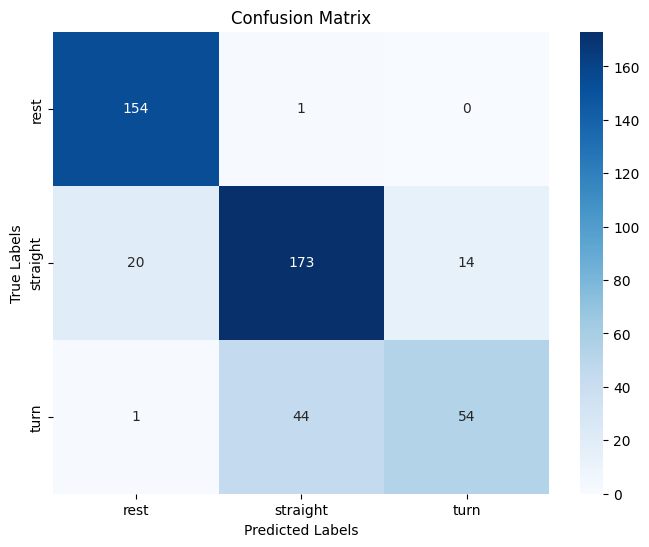


Classification Report:
               precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification reports

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. When considering the differance between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3) Based on only two evalution model 2 is a better fit. Becasue with lower training and validation section 2 suggests the model may not fully capture the training data's complexity, but it is able to match the test accuracy of section 1 with fewer feaatures, and it idicates that it generalizes well.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 mark)


# Extract the target vector
y1 = test_set1['motion_state']

# Extract the selected features
X1 = test_set1[selected_features]

# Display the first two rows of X1 to verify
X1.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2


# Extract the target vector
y2 = test_set2['motion_state']

# Extract the selected features
X2 = test_set2[selected_features]

# Display the first two rows of X2 to verify
X2.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Calculate and print the accuracy for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the accuracy for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

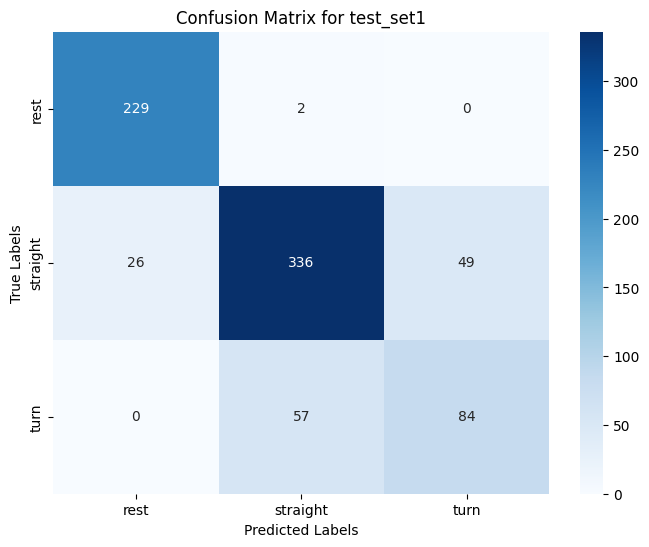


Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y1, y1_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report
print("\nClassification Report for test_set1:\n", classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

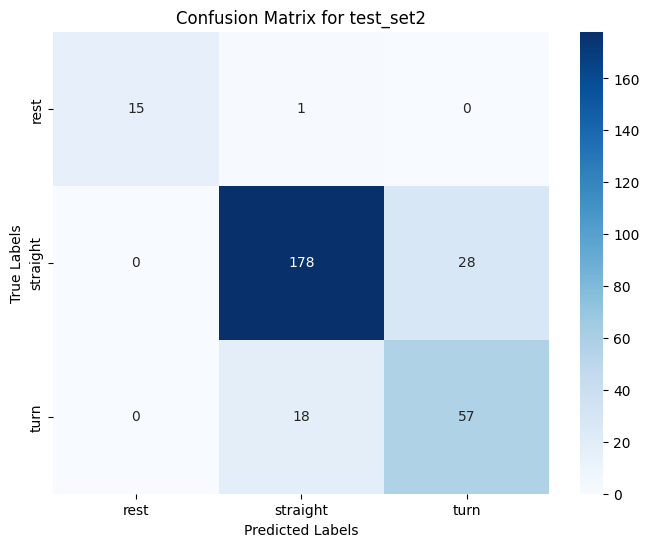


Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Compute confusion matrix
conf_matrix = confusion_matrix(y2, y2_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print the classification report
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))


In [ ]:
print(X2.head())
print(y2.value_counts())


     ax_var        ay_var    az_sum     a_sum        gz_var
0  0.000002  3.020959e-07  9.791451  9.800683  1.405038e-09
1  0.000003  6.859937e-07  9.785619  9.797741  1.164381e-09
2  0.000002  2.651305e-07  9.794267  9.803662  1.198662e-09
3  0.000002  1.084477e-07  9.788876  9.798112  1.312833e-09
4  0.000001  5.710469e-08  9.791129  9.798496  1.235914e-09
motion_state
straight    206
turn         75
rest         16
Name: count, dtype: int64


___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.
When comparing the test_set 1 and test_set2 , drop in test_2 is evident as accuracy of test_set1 us 0.92 and accuracy of test_set2 us 0.84. For test_set1 oerformance is balanced across the classes, except for the turn class.The model fits the training/validation set adequately but underfits slightly (cross-validation score: 0.82).
2. Section 1:The Section 1 model performs well on the training and validation data, indicating it fits the training data better than the Section 2 model.The high training score (0.98) suggests overfitting to the training data.
Section 2:The Section 2 model underfits slightly on training/validation data but performs comparably to Section 1 on the test sets.

Section 2 gives a better fit. Although its training/validaion scores are lower, it avoides overfitting and gives competitive performance on the test sets. It is simple and more interpretable that makes it more suitable for generalization.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   Selected features: ax_min, ay_var, az_sum, gz_var, gx_min, a_sum, g_sum.
 These features are chosen because they represent the motion patterns of the vehicle in different directions, Variance captures the fluctuations,Sum and mean features capture the overall movement and help distinguish between rest, straight, and turn.


In [ ]:
# TODO - Load group selected features from cv_set to X

# Define the group selected features
selected_features = ['ax_min', 'ay_var', 'az_sum', 'a_sum', 'gz_var', 'gx_min', 'g_sum']

# Extract the selected features
X = cv_set[selected_features]

# Display the first two rows to verify
X.head(2)


,ax_min,ay_var,az_sum,a_sum,gz_var,gx_min,g_sum
0,-0.001539,1.319665e-07,9.789349,9.797418,7.446916e-10,-0.000178,0.022554
1,-0.001752,1.073067e-07,9.789095,9.798815,6.983481e-10,-0.000141,0.021731


In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

,ax_min,ay_var,az_sum,a_sum,gz_var,gx_min,g_sum
0,-0.001539,1.319665e-07,9.789349,9.797418,7.446916e-10,-0.000178,0.022554
1,-0.001752,1.073067e-07,9.789095,9.798815,6.983481e-10,-0.000141,0.021731


In [ ]:
print(cv_set.columns.tolist())


['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    # 30% of data for testing
    random_state=42,  # Set random state for reproducibility
    stratify=y        # Stratify by the target variable
)
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('classifier', SVC())          # Step 2: Use Support Vector Classifier
])
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test different scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Kernel coefficient
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# Print the best parameter set
print("Best params:\n{}\n".format(grid.best_params_))

# Print the best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(
    grid.cv_results_['mean_train_score'][grid.best_index_]
))

# Print the best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Compute and print the test set accuracy
test_set_accuracy = grid.best_estimator_.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))


Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.93
Best cross-validation validation score: 0.91
Test-set score: 0.92


Display the confusion matrix and print the classification report for the trained model using the *test* split.

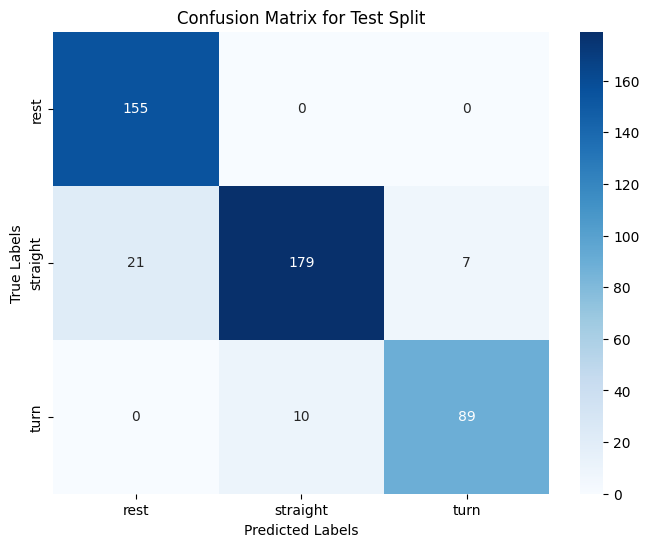


Classification Report:
               precision    recall  f1-score   support

        rest       0.88      1.00      0.94       155
    straight       0.95      0.86      0.90       207
        turn       0.93      0.90      0.91        99

    accuracy                           0.92       461
   macro avg       0.92      0.92      0.92       461
weighted avg       0.92      0.92      0.92       461



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Split')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 =y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_min,ay_var,az_sum,a_sum,gz_var,gx_min,g_sum
0,-0.001191,7.749919e-08,9.786930,9.801661,7.727190e-10,-0.000168,0.025634
1,-0.001104,9.243000e-08,9.788127,9.802481,8.871433e-10,-0.000148,0.025218


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,ax_min,ay_var,az_sum,a_sum,gz_var,gx_min,g_sum
0,-0.002970,3.020959e-07,9.791451,9.800683,1.405038e-09,-0.000115,0.012437
1,-0.003824,6.859937e-07,9.785619,9.797741,1.164381e-09,-0.000128,0.013805


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# Calculate and print the test score accuracy for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the test score accuracy for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.86
test_set2 score: 0.91


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

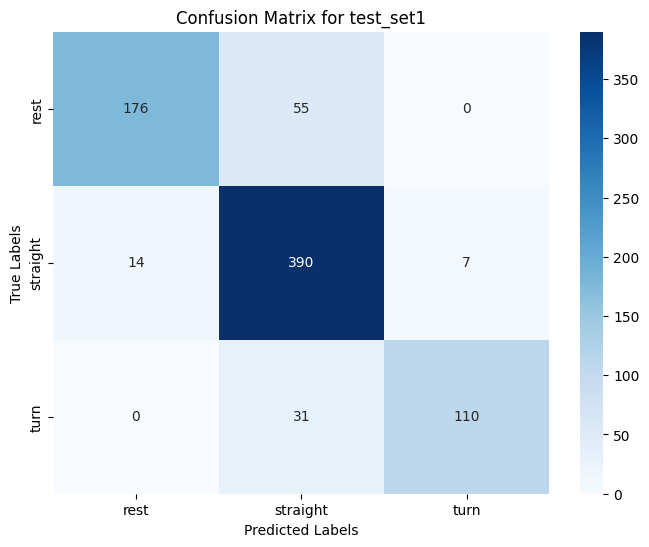


Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.93      0.76      0.84       231
    straight       0.82      0.95      0.88       411
        turn       0.94      0.78      0.85       141

    accuracy                           0.86       783
   macro avg       0.90      0.83      0.86       783
weighted avg       0.87      0.86      0.86       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Compute confusion matrix
conf_matrix_1 = confusion_matrix(y1, y1_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report
print("\nClassification Report for test_set1:\n", classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

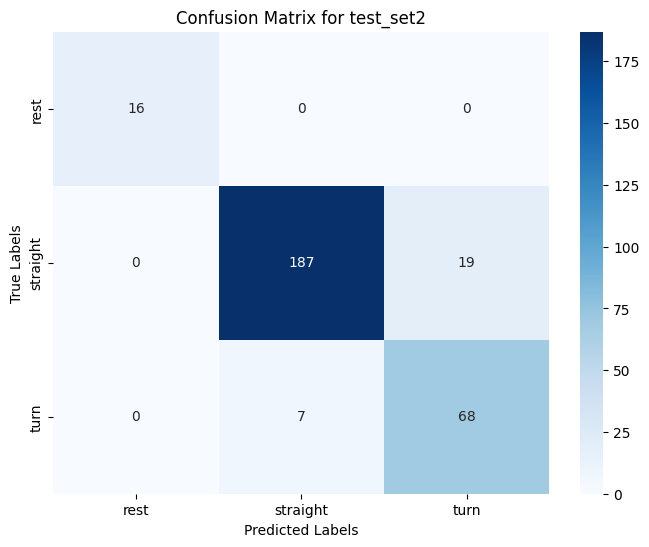


Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       1.00      1.00      1.00        16
    straight       0.96      0.91      0.94       206
        turn       0.78      0.91      0.84        75

    accuracy                           0.91       297
   macro avg       0.92      0.94      0.92       297
weighted avg       0.92      0.91      0.91       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Compute confusion matrix
conf_matrix_2 = confusion_matrix(y2, y2_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print the classification report
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))


___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X

# Extract all features except the target column ('motion_state')
X = cv_set.drop(columns=['motion_state'])

# Display the first two rows to verify
X.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y

# Extract the target column ('motion_state') into y
y = cv_set['motion_state']

# Display the first few rows of the target to verify
y.head()


,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
from sklearn.model_selection import train_test_split

# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    # 30% of data for testing
    random_state=42,  # Set random state for reproducibility
    stratify=y        # Stratify by the target variable
)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Initialize the Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('pca', PCA()),                # Step 2: Perform PCA
    ('classifier', SVC())          # Step 3: Train the SVM classifier
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test different scalers
    'pca__n_components': [4, 7, 11, 14, 16],
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Kernel coefficient
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}

In [ ]:
# Perform the grid search to train model and tune hyperparameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search on the training data
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

In [ ]:
# TODO: Print the results from the grid search

# Print the best parameter set
print("Best params:\n{}\n".format(grid.best_params_))

# Print the best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(
    grid.cv_results_['mean_train_score'][grid.best_index_]
))

# Print the best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Compute and print the test set accuracy
test_set_accuracy = grid.best_estimator_.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))


Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 14, 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.94
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

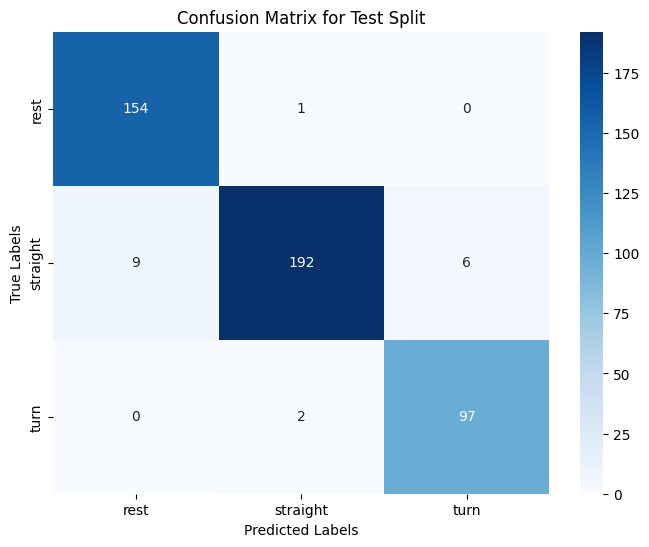


Classification Report for Test Set:
               precision    recall  f1-score   support

        rest       0.94      0.99      0.97       155
    straight       0.98      0.93      0.96       207
        turn       0.94      0.98      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.97      0.96       461
weighted avg       0.96      0.96      0.96       461



In [ ]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Split')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_test_pred))


___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1

# Extract the target vector
y1 = test_set1['motion_state']

# Extract all features (except the target)
X1 = test_set1.drop(columns=['motion_state'])

# Display the first two rows to verify
X1.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2

# Extract the target vector
y2 = test_set2['motion_state']

# Extract all features (except the target)
X2 = test_set2.drop(columns=['motion_state'])

# Display the first two rows to verify
X2.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


In [ ]:
#Section 4.2: Model Evaluation on Test Datasets 1 and 2
#4.2.1: Extract Features and Targets from Test Datasets

# Load features and targets from test_set1
X1 = test_set1.drop(columns=['motion_state'])
y1 = test_set1['motion_state']

# Load features and targets from test_set2
X2 = test_set2.drop(columns=['motion_state'])
y2 = test_set2['motion_state']

# Verify structure
X1.head(2)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Calculate and print the test score accuracy for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the test score accuracy for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.93
test_set2 score: 0.67


In [ ]:
#4.2.2: Visualize Results
#Evaluate the trained model on the test datasets and display the results.
# Test score accuracies
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))


test_set1 score: 0.92
test_set2 score: 0.91


In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

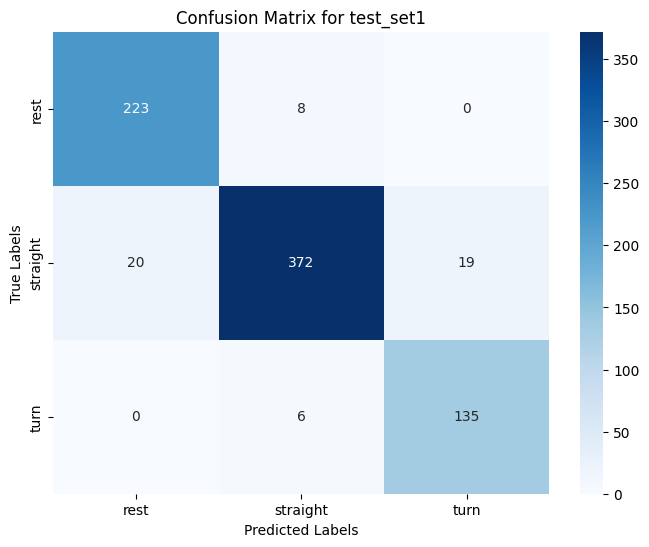


Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.92      0.97      0.94       231
    straight       0.96      0.91      0.93       411
        turn       0.88      0.96      0.92       141

    accuracy                           0.93       783
   macro avg       0.92      0.94      0.93       783
weighted avg       0.93      0.93      0.93       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Compute the confusion matrix
conf_matrix_1 = confusion_matrix(y1, y1_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report
print("\nClassification Report for test_set1:\n", classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

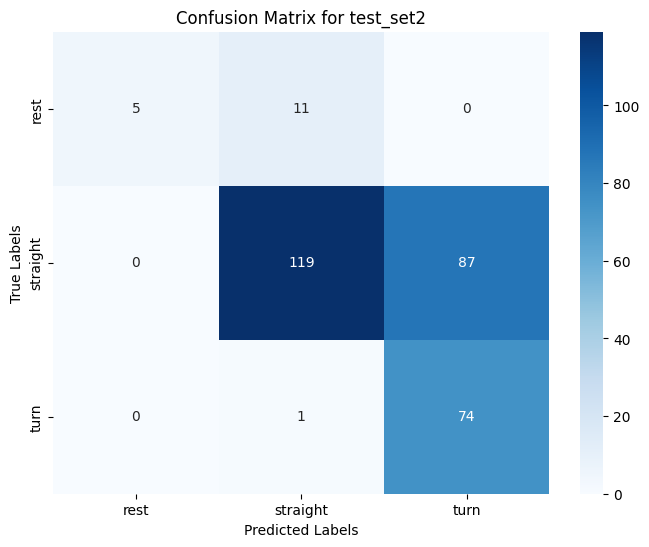


Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       1.00      0.31      0.48        16
    straight       0.91      0.58      0.71       206
        turn       0.46      0.99      0.63        75

    accuracy                           0.67       297
   macro avg       0.79      0.63      0.60       297
weighted avg       0.80      0.67      0.67       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Compute the confusion matrix
conf_matrix_2 = confusion_matrix(y2, y2_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print the classification report
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))


In [ ]:
# Confusion matrix and classification report for test_set2
y2_pred = grid.predict(X2)
print("Confusion Matrix (Test Set 2):\n", confusion_matrix(y2, y2_pred))
print("Classification Report (Test Set 2):\n", classification_report(y2, y2_pred))


Confusion Matrix (Test Set 2):
 [[ 16   0   0]
 [ 10 192   4]
 [  0  14  61]]
Classification Report (Test Set 2):
               precision    recall  f1-score   support

        rest       0.62      1.00      0.76        16
    straight       0.93      0.93      0.93       206
        turn       0.94      0.81      0.87        75

    accuracy                           0.91       297
   macro avg       0.83      0.92      0.86       297
weighted avg       0.92      0.91      0.91       297



___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)


 4.2.3 - Answers
**1.Model trained in Section 1 using all features:**
Train Score: Section 1  is slightly higher than Section 4
Validation Score: Section 1  is slightly higher than Section 4 .

Test-set 1 Accuracy: Section 1 is slightly lower than Section 4 .

Test-set 2 Accuracy: Section 1  is significantly lower than Section 4 .

**Model trained in Section 2 using selected features:**

Train Score: Section 2  is lower than Section 4 .

Validation Score: Section 2  is lower than Section 4 .

Test-set 1 Accuracy: Section 2  is lower than Section 4 .

Test-set 2 Accuracy: Section 2  is higher than Section 4 .

**Model trained in Section 3 using group selected features:**

Train Score: Section 3  is lower than Section 4 .

Validation Score: Section 3  is lower than Section 4 .

Test-set 1 Accuracy: Section 3  is lower than Section 4 .

Test-set 2 Accuracy: Section 3  is higher than Section 4 .
After comparing the models it can be seen that the model with PCS generally performs well in terms of train score, validation score and test-set1 compared to others. However,its test-set2 accuracy is lower in section 2 anf section 3.
2.
The differences in performance between Section 1 and Section 4 are primarily due to overfitting in Section 1 and the generalization benefits of PCA in Section 4.
While Section 1 excels in accuracy on datasets with similar distributions, Section 4 provides a more robust and generalizable solution by reducing noise and irrelevant features.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1. Model selected: Random Forest
Why Choose Random Forest?
Robustness to Overfitting:

Random Forest uses an ensemble of decision trees, reducing the likelihood of overfitting, especially on noisy datasets.
Feature Importance:

Random Forest provides feature importance scores, helping in interpreting the contribution of individual features to the predictions.
Works Well with Limited Pre-Selected Features:

Random Forest performs well when given a small subset of highly relevant features, as identified in Section 2.
Efficiency:

Compared to algorithms like Neural Networks or Gradient Boosting Machines, Random Forest is computationally efficient and easier to tune.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
# TODO - Load group selected features from cv_set to X

# Define the selected features from Section 2
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']

# Extract the selected features into X
X = cv_set[selected_features]

# Display the first two rows to verify
X.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [24]:
# TODO - Load motion_state column (target vector) into y

# Extract the target column
y = cv_set['motion_state']

# Display the first few rows to verify
print("Target (y):\n", y.head())


Target (y):
 0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    # 30% of data for testing
    random_state=42,  # Set random state for reproducibility
    stratify=y        # Stratify by the target variable
)

In [26]:
# Step 2: Initialize Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),               # Step 1: Feature scaling
    ('classifier', RandomForestClassifier())    # Step 2: Random Forest Classifier
])

In [27]:
# Step 3: Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees
    'classifier__max_depth': [None, 10, 20],     # Depth of trees
    'classifier__min_samples_split': [2, 5, 10], # Minimum samples for split
    'classifier__min_samples_leaf': [1, 2, 4],   # Minimum samples in leaf
    'classifier__bootstrap': [True, False],      # Bootstrap samples
    'scaler': [StandardScaler(), None]           # With and without scaling
}

In [28]:
# Step 4: Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200],
                         'scaler': [StandardScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

# Print the best parameters
print("Best params:\n{}\n".format(grid.best_params_))

# Print the best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))

# Print the best cross-validation validation score
print("Best cross-validation validation test score: {:.2f}".format(grid.best_score_))

# Test set accuracy
test_set_score = grid.best_estimator_.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_score))


Best params:
{'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'scaler': StandardScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.85
Test-set score: 0.84


Display the confusion matrix and print the classification report for the trained model using the *test* split.

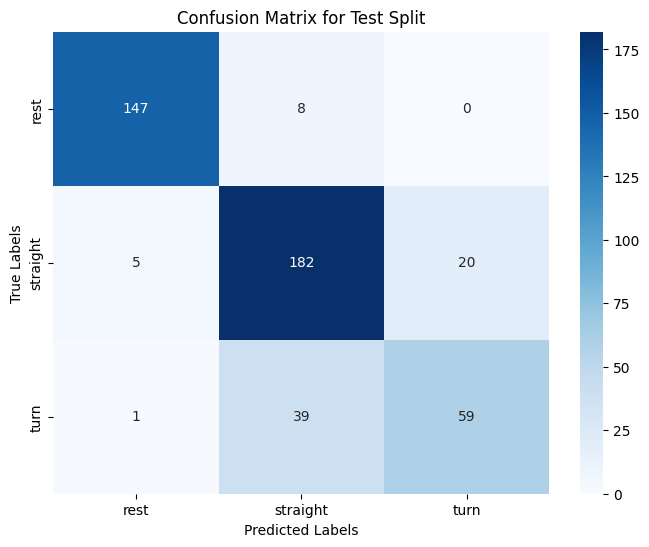


Classification Report:
               precision    recall  f1-score   support

        rest       0.96      0.95      0.95       155
    straight       0.79      0.88      0.83       207
        turn       0.75      0.60      0.66        99

    accuracy                           0.84       461
   macro avg       0.83      0.81      0.82       461
weighted avg       0.84      0.84      0.84       461



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report

# Predict on the test split
y_test_pred = grid.best_estimator_.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Split')
plt.show()

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1

# Define the selected features from Section 2
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']

# Load the target vector
y1 = test_set1['motion_state']

# Load the selected features
X1 = test_set1[selected_features]

# Display the first two rows to verify
X1.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2

# Load the target vector
y2 = test_set2['motion_state']

# Load the selected features
X2 = test_set2[selected_features]

# Display the first two rows to verify
X2.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Test accuracy for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Test accuracy for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.85
test_set2 score: 0.70


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

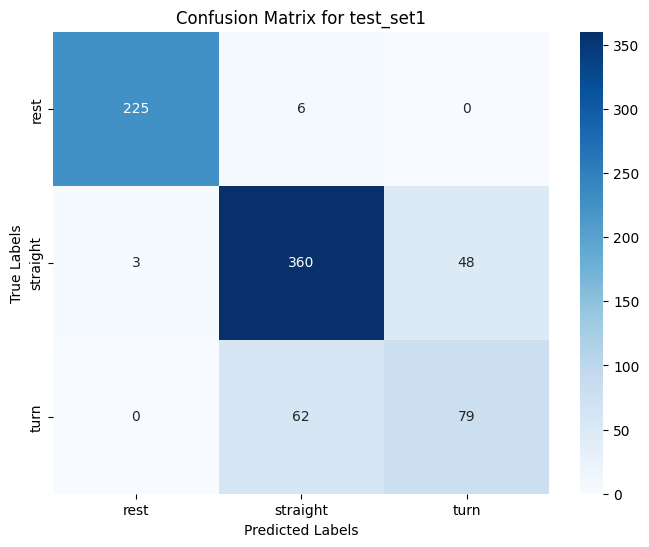


Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.99      0.97      0.98       231
    straight       0.84      0.88      0.86       411
        turn       0.62      0.56      0.59       141

    accuracy                           0.85       783
   macro avg       0.82      0.80      0.81       783
weighted avg       0.84      0.85      0.85       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Compute confusion matrix
conf_matrix_1 = confusion_matrix(y1, y1_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print classification report
print("\nClassification Report for test_set1:\n", classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

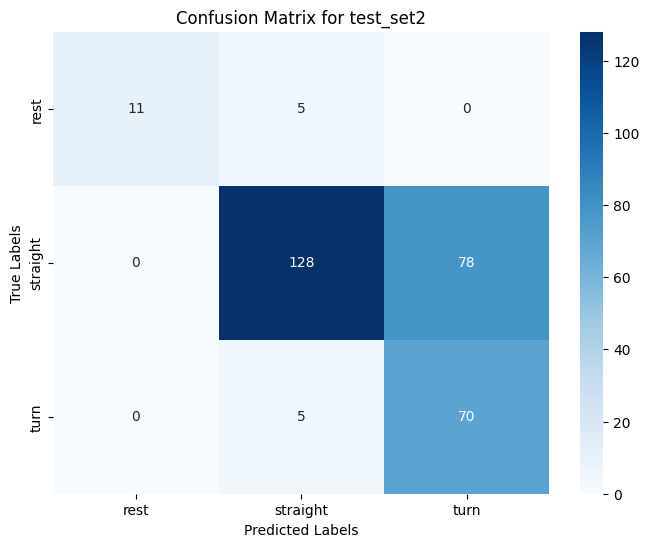


Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.93      0.62      0.74       206
        turn       0.47      0.93      0.63        75

    accuracy                           0.70       297
   macro avg       0.80      0.75      0.73       297
weighted avg       0.82      0.70      0.72       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Compute confusion matrix
conf_matrix_2 = confusion_matrix(y2, y2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print classification report
print("\nClassification Report for test_set2:\n", classification_report(y2, y2_pred))


___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

Answer- Section 2 model shows higher accuracy cross test sets compared to model trained in this section.while, Random Forest performs better on Test-set 1 but for test-set 2 SVC is better.

Model section 5 shows higher variability and misclassification, especially on test-set2.

Despite better cross-validation, the Random forest underperforms on independent test sets, indicationg potential overfitting.

Overfitting in the random forest may be due to complex tress or insufficient regulation, SVC's better with handling of non-linear boundaries, and Random Forest's sensitivity to noisy or imbalanced features.


____